In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objs as gobj
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


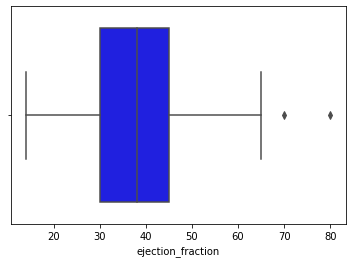

In [7]:
#Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.

sns.boxplot(x = df.ejection_fraction, color = 'Blue')
plt.show()

In [8]:
#removing outliers
df = df[df['ejection_fraction']< 70]

<AxesSubplot:title={'center':'Searching for missing values:'}>

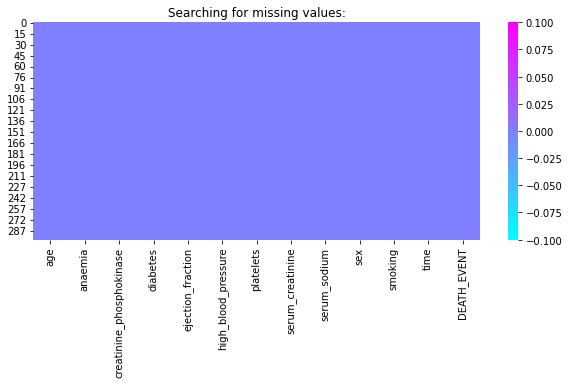

In [9]:
plt.figure(figsize=(10,4))
plt.title('Searching for missing values:')
sns.heatmap(data=df.isnull(),cmap = 'cool', cbar = True)

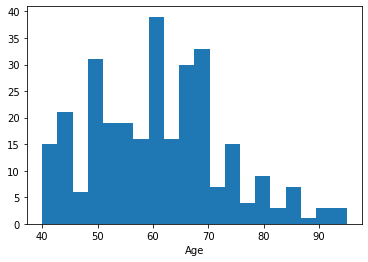

In [10]:
#Visualizing the continous variables
plt.hist(df["age"], bins=20)
plt.xlabel('Age')
plt.show()

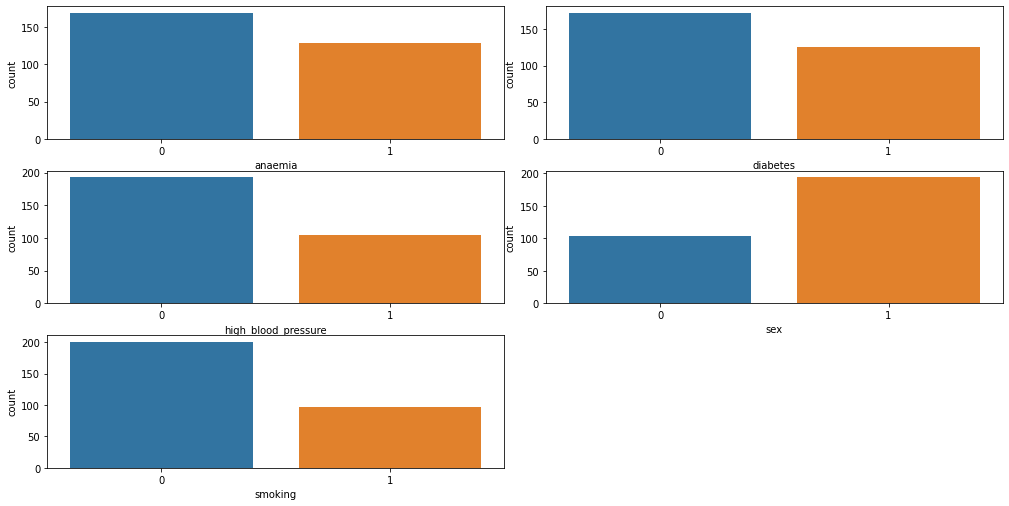

In [13]:
#Checking categorical variables
fig, ax  = plt.subplots(nrows = 3, ncols = 2, figsize = (14,7))
plt.tight_layout()
sns.countplot(df['anaemia'], ax=ax[0,0])
sns.countplot(df['diabetes'], ax=ax[0,1])
sns.countplot(df['high_blood_pressure'], ax=ax[1,0])
sns.countplot(df['sex'], ax=ax[1,1])
sns.countplot(df['smoking'], ax=ax[2,0])
fig.delaxes(ax[2,1])

<AxesSubplot:>

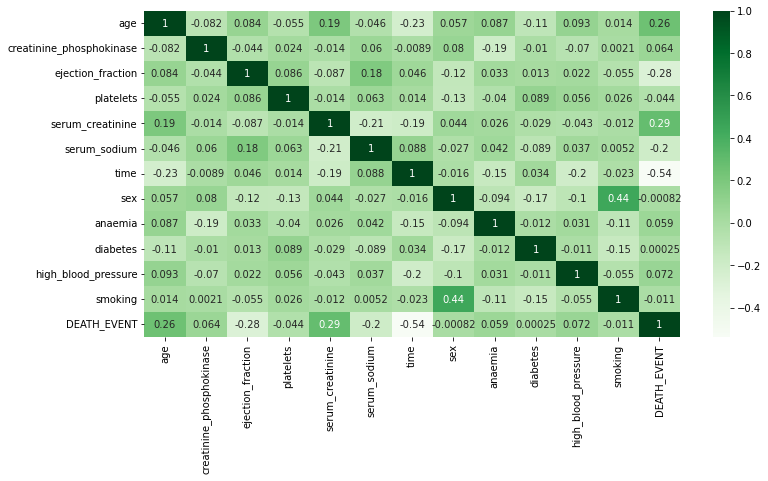

In [16]:
#using heatmap to check the correlation of the variables
plt.figure(figsize = (12,6))
sns.heatmap(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']].corr(),annot=True, cmap="Greens")

In [17]:
deaths=df[df['DEATH_EVENT']==True]
deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
#no of deathevent
deaths.shape

(95, 13)

In [19]:
#no of death events that had anaemia,diabetes,high blood pressure,smokes.

a=deaths['anaemia'].sum()
b=deaths['diabetes'].sum()
c=deaths['high_blood_pressure'].sum()
d=deaths['smoking'].sum() 

to_print="Anaemic: {}, had diabetes: {}, had high blood pressure:{}, smokes:{}".format(a,b,c,d)
print(to_print)

Anaemic: 45, had diabetes: 40, had high blood pressure:38, smokes:30
